<a href="https://colab.research.google.com/github/tmdgusya/ai-study-repository/blob/main/make_a_deep_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!git clone https://github.com/ndb796/weather_dataset
%cd weather_dataset

Cloning into 'weather_dataset'...
remote: Enumerating objects: 1117, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 1117 (delta 0), reused 3 (delta 0), pack-reused 1111 (from 1)
Receiving objects: 100% (1117/1117), 85.23 MiB | 46.28 MiB/s, done.
/content/weather_dataset


# load required libraries

In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets

import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import random_split

import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np

In [6]:
transform_train = transforms.Compose([
    transforms.Resize((225, 225)),
    transforms.RandomHorizontalFlip(), # 학습을 진행할때는 데이터를 랜덤으로 섞어야 함
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5],
    )
])

transforms_val = transforms.Compose([
    transforms.Resize((225, 225)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5],
    )
])

transforms_test = transforms.Compose([
    transforms.Resize((225, 225)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.5, 0.5, 0.5],
        std=[0.5, 0.5, 0.5],
    )
])

In [7]:
train_dataset = datasets.ImageFolder(root='./train', transform=transform_train)
# val_dataset = datasets.ImageFolder(root='./val', transform=transforms_val)


dataset_size = len(train_dataset)
train_size = int(dataset_size * 0.8)
val_size = dataset_size - train_size

train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])
test_dataset = datasets.ImageFolder(root='./test', transform=transforms_test)

train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True) # suffle data on each epoch
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=64, shuffle=False)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

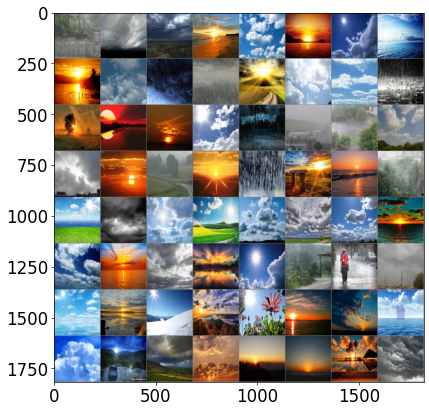

<generator object <genexpr> at 0x7d0c9018dfc0>


In [8]:
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size': 20})

def imshow(input):
  # torch.Tensor => numpy
  input = input.numpy().transpose((1,2,0))
  # undo image normalization
  mean = np.array([0.5, 0.5, 0.5])
  std = np.array([0.5, 0.5, 0.5])
  input = std * input + mean # 정규화를 진행하기전의 이미지로 되돌리기
  input = np.clip(input, 0, 1)
  plt.imshow(input)
  plt.show()

classname = {
    0: 'cloudy',
    1: 'rain',
    2: 'shine',
    3: 'sunrise'
}

# load a batch train of image
iterator = iter(train_dataloader)

# visualize
imgs, label = next(iterator)
out = torchvision.utils.make_grid(imgs)
imshow(out)
print([classname[label[i].item()]] for i in range(len(imgs)))

딥러닝 모델 학습

In [9]:
class Model1(nn.Module):
  def __init__(self):
    super(Model1, self).__init__()
    self.linear1 = nn.Linear(256*256*3, 4) # 입력층의 뉴련개수: 256 * 256 * 3 / 출력층의 뉴런 개수: 4
    self.flatten = nn.Flatten()

  def forward(self, x):
    x = self.flatten(x)
    x = self.linear1(x)
    return x

class Model2(nn.Module):
  def __init__(self):
    super(Model2, self).__init__()
    self.linear1 = nn.Linear(256*256*3, 64)
    self.linear2 = nn.Linear(64, 4)
    self.flatten = nn.Flatten()

  def forward(self, x):
    x = self.flatten(x)
    x = self.linear1(x)
    x = self.linear2(x)
    return x
